# **A Deep Dive into Jakarta's Air Quality Index from 2010 to 2021 through Data Exploration, Feature Engineering, and Classification Model**

* Alyza Rahima Pramudya -	2502032125
* Marcel Kurniawan - 2501977090
* Matthew Nicholas Alfian - 2602105960  
* Shafa Amira Qonitatin - 2502009173

**About Dataset:**


Dataset: https://www.kaggle.com/datasets/senadu34/air-quality-index-in-jakarta-2010-2021

**Explanation of variables from the data above as follows:**
* tanggal : Date of air quality measurement
* stasiun : Measurement location at the station
* pm10 : Particulate matter one of the measured parameters
* pm25 : Particulate matter one of the parameters measured
* so2 : Sulfide (in the form of SO2) one of the parameters measured
* co : Carbon Monoxide one of the parameters measured
* o3 : Ozone is one of the measured parameters
* no2 : Nitrogen dioxide one of the parameters measured
* max : The highest measured value of all parameters measured at the same time
* critical: The parameter with the highest measurement results
* category : Category based on the calculation of the air pollution standard index

----

## **Problem and Objective**

#### **Problem**
DKI Jakarta is one of the cities with the highest level of air pollution in Indonesia. Based on data from the DKI Jakarta Environmental Agency, the average Air Pollution Standard Index (ISPU) in Jakarta in 2023 is 81-98, which means Jakarta's air quality is in the moderate-unhealthy category.

Air pollution in Jakarta is caused by various factors, including:
* Motor vehicle activity
* Industrial activities
* Waste accumulation
* Pollution from outside the city

The impact of air pollution on public health is very serious. Air pollution can cause various diseases, such as respiratory problems, heart disease and cancer. In addition, air pollution can also reduce work productivity and reduce people's quality of life.

#### **Objective**
The objective of the air pollution index classification project in the city of Jakarta is to develop a predictive model capable of classifying air quality within a specific range of pollution indices. The ultimate goal is to build an accurate and efficient air pollution index classification model. An accurate classification model can predict the level of air pollution precisely, so it can be used to provide useful information for the public and government. An efficient model can be processed quickly, so it can be used to monitor air quality in real-time. Through the analysis of historical data and environmental variables such as air particulate levels, hazardous gas concentrations, and other factors that affect air quality, this project aims to create a model that can predict future air pollution levels. Thus, it can help the government and related agencies in analyzing the factors that affect Jakarta's air quality. The results of this analysis can be used to formulate effective policies and strategies to take appropriate measures to reduce the impact of air pollution in Jakarta, as well as provide more timely information to the public to protect their health.

#### **Sustained Development Goals**
**SDG 3: Good Health and Well-being**
Improving the accuracy of air pollution index classification can help to reduce health risks due to air pollution. This is in line with the goal of SDG 3 to ensure a healthy and prosperous life for all people at all ages.

**SDG 11: Sustainable Cities and Communities**
The development of an air pollution index classification model that can be applied in other cities in Indonesia can help to improve the quality of life of people in urban areas. This is in line with the goal of SDG 11 to make cities inclusive, resilient and sustainable.

**SDG 13: Climate Action**
Air pollution is also one of the impacts of climate change. Therefore, efforts to reduce air pollution can also help to address climate change. This is in line with the goal of SDG 13 to take urgent action to combat climate change and its impacts.

# **Import Data and Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ispu_dki1.csv')

In [ ]:
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,pm25
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG,NaN
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK,NaN
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK,NaN
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK,NaN
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK,NaN


# **1) Exploratory Data Analysis (EDA)**

#### **Data Overview**

In [ ]:
df.shape

(4383, 11)

Based on this output, we can see that our dataset consists of 4383 entries/observations and 11 columns. Which indicates that the number of datasets we have is enough to conduct this experiment.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   stasiun   4383 non-null   object 
 2   pm10      4171 non-null   float64
 3   so2       4208 non-null   float64
 4   co        4233 non-null   float64
 5   o3        4180 non-null   float64
 6   no2       4190 non-null   float64
 7   max       4374 non-null   float64
 8   critical  4273 non-null   object 
 9   categori  4383 non-null   object 
 10  pm25      365 non-null    float64
dtypes: float64(7), object(4)
memory usage: 376.8+ KB


Based on output above, we can see that each row represents a set of measurements, and each column represents a different attribute. The columns include 'tanggal', 'stasiun', and various pollutants like 'pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori', and 'pm25'.

The data types vary between object (text) and float64 (decimal numbers). Notably, **there are missing values** (NaN) in some columns, such as 'pm10', 'so2', etc.


The data to be used consists of 4383 rows and 11 columns.

In [ ]:
df.describe()

,pm10,so2,co,o3,no2,max,pm25
count,4171.000000,4208.000000,4233.000000,4180.000000,4190.000000,4374.000000,365.000000
mean,52.226325,18.091017,24.852351,49.514593,14.107637,60.741198,69.073973
std,14.578838,10.755446,11.153177,25.784704,8.948707,22.150779,18.117065
min,4.000000,1.000000,3.000000,3.000000,1.000000,0.000000,20.000000
25%,43.000000,10.000000,17.000000,29.000000,7.000000,49.000000,57.000000
50%,54.000000,17.000000,24.000000,46.000000,14.000000,60.000000,70.000000
75%,62.000000,25.000000,31.000000,66.000000,19.000000,73.000000,81.000000
max,104.000000,106.000000,95.000000,198.000000,79.000000,198.000000,112.000000


Based on the output above, we can include that:
* Some pollutants, like 'pm25,' have significantly fewer non-null values (365), suggesting **potential data gaps**.
* 'o3' has a relatively **high standard deviation** of 25.78, indicating more variability in ozone levels
* the 75th percentile of 'co' is 31, indicating that 75% of the data points have a 'co' **value of 31 or lower**
* high max values in 'o3' and 'max' indicate **potential outliers** that might need closer examination.

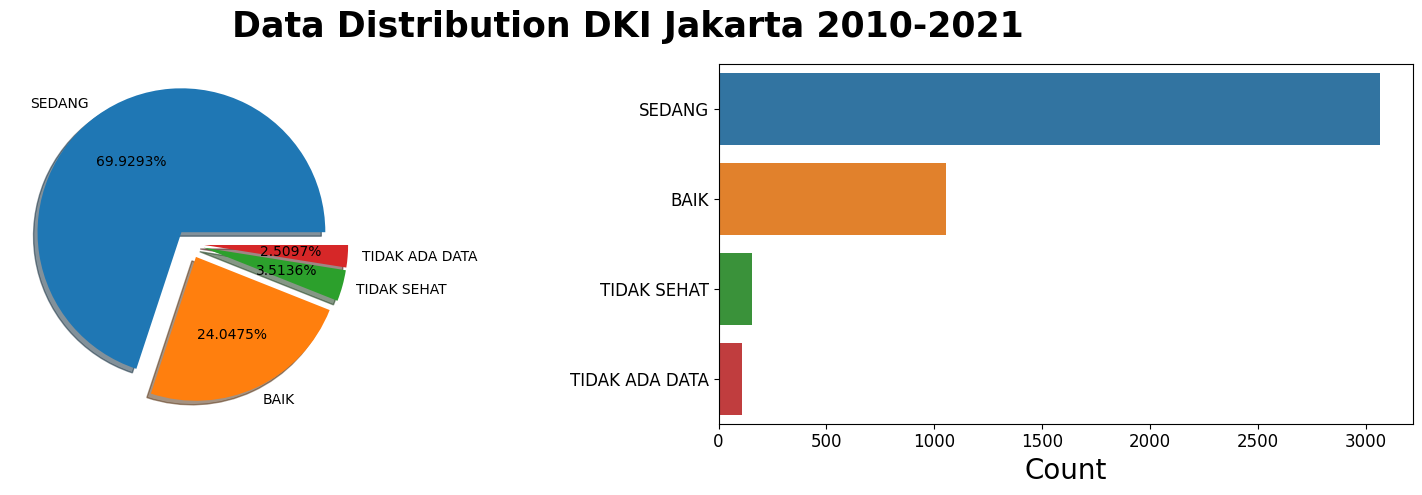

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

categori_counts = df['categori'].value_counts()
ax[0].pie(
    categori_counts,
    labels=categori_counts.index,
    shadow=True,
    explode=[0.1 for _ in range(categori_counts.nunique())],
    autopct='%.4f%%',
    textprops={'size': 10, 'color': 'black'}
)

sns.countplot(data=df, y='categori', ax=ax[1], order=categori_counts.index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize=12)
ax[1].set_xlabel('Count', fontsize=20)
ax[1].set_ylabel(None)
plt.xticks(fontsize=12)

fig.suptitle('Data Distribution DKI Jakarta 2010-2021', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

From the output above, we can see that the **majority** of our dataset corresponds to the 'SEDANG' category, suggesting that the distribution of air pollutants in Jakarta tends to hover **around average levels**. This implies a prevalent state of moderate pollution in the recorded measurements. And 2% of our dataset corresponds to the 'TIDAK ADA DATA' category, which means that 2% of our dataset indicates a small portion of the dataset where data might be missing or unavailable.

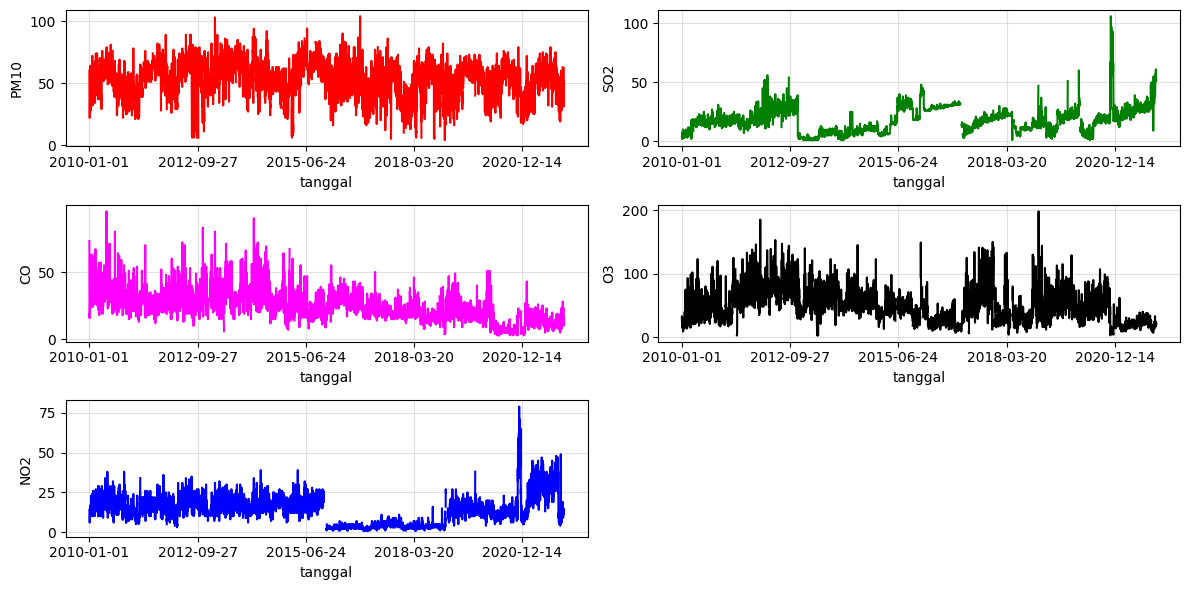

In [ ]:
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']
colors = ['red', 'green', 'magenta', 'black', 'blue']

fig, axs = plt.subplots(3, len(pollutants) // 2, figsize=(12, 6))

for i, pollutant in enumerate(pollutants):
    if i < len(pollutants):
        row = i // (len(pollutants) // 2)
        col = i % (len(pollutants) // 2)
        df.plot(x='tanggal', y=pollutant, kind='line', color=colors[i], ax=axs[row, col], legend=False)
        axs[row, col].set_ylabel(pollutant.upper())
        axs[row, col].grid(True, linestyle='-', alpha=0.7, color='lightgrey')

if len(pollutants) < 6:
    for i in range(len(pollutants), 3 * (len(pollutants) // 2)):
        axs.flat[i].axis('off')

plt.xlabel('Tanggal')
plt.tight_layout()
plt.show()


From the line chart above, we can see that the air pollution metric has remained stable over time, with no significant increase or decrease. However, it should be noted that there are missing values in certain ranges and also extreme values.

<Figure size 1280x960 with 0 Axes>

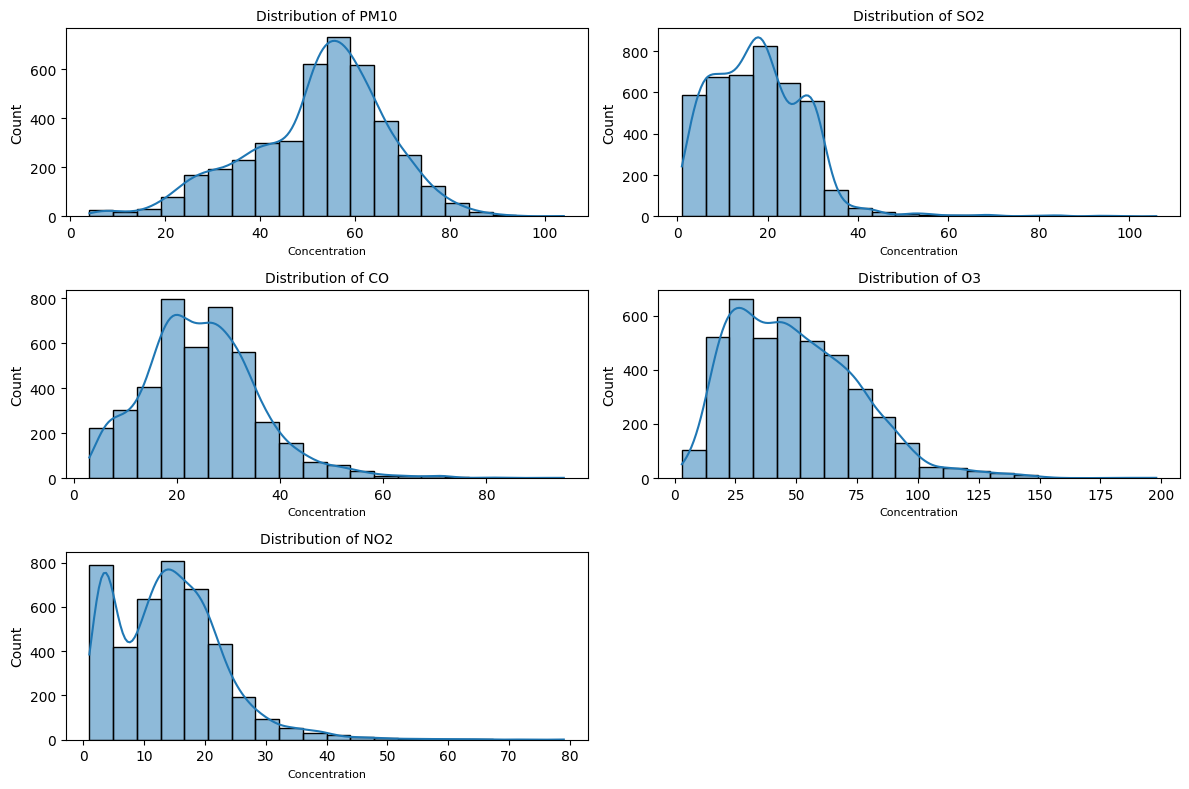

In [ ]:
num_cols = 2
num_rows = (len(pollutants) + 1) // num_cols
plt.figure(dpi=200)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, pollutant in enumerate(pollutants):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[pollutant], kde=True, bins=20, ax=axs[row, col], linewidth=1)
    axs[row, col].set_title(f'Distribution of {pollutant.upper()}', fontsize=10)
    axs[row, col].set_xlabel('Concentration', fontsize=8)

if len(pollutants) % num_cols != 0:
    for i in range(len(pollutants) % num_cols, num_cols):
        fig.delaxes(axs[num_rows - 1, i])

plt.tight_layout()
plt.show()

The output above is a density and histogram plot. The plot is used to see the distribution of Jakarta Air Quality data.
It can be seen that only the PM10 attribute is sufficient to form a normal distribution, while the other attributes are **not normally distributed**.

#### **Check Duplicated and Missing Data**

In [ ]:
print("Duplicated value in dataframe:", df.duplicated().sum())

Duplicated value in dataframe: 0


There are no duplicated values in the data.

In [ ]:
print("Null value in dataframe:")
null_df = df.isnull().sum()
print(null_df)

Null value in dataframe:
tanggal        0
stasiun        0
pm10         212
so2          175
co           150
o3           203
no2          193
max            9
critical     110
categori       0
pm25        4018
dtype: int64


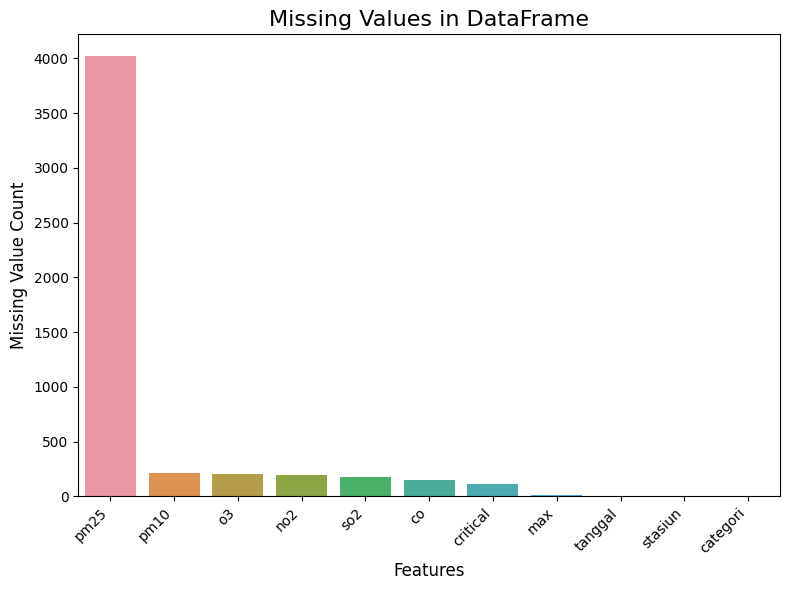

In [ ]:
null_df = null_df.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=null_df.index, y=null_df.values)
plt.title("Missing Values in DataFrame", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Missing Value Count", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

It can be seen that the **pm25 feature has the highest number of missing values**, which is then followed by other features.

# **2) Feature Engineering**

### **2.1) Feature Selection**

Pilih variable untuk di-drop:

1. `pm25`: we decided to drop this column because its values exist only in the 2021 data and this could **lead to inconsistencies** or difficulties when trying to build a model that requires consistency in input variables.
2. `critical` and `max`: basically this two columns only records the highest value of all parameters and it might be considered as additional information that is **not really necessary**.
3. `stasiun`: we only focus on conducting experiments at one station only, which is DK1 (Bunderan HI) because the variables/observations at several stations are not evenly collected and we feel that the amount of data at **DKI (Bunderan HI) is sufficient** to be used in this project.
4. `tanggal`: we will **not perform a time series classification**, that's why we don't need this column



In [ ]:
df.drop(['tanggal','pm25','critical','max','stasiun'], axis=1, inplace=True)

In [ ]:
df.head()

,pm10,so2,co,o3,no2,categori
0,60.0,4.0,73.0,27.0,14.0,SEDANG
1,32.0,2.0,16.0,33.0,9.0,BAIK
2,27.0,2.0,19.0,20.0,9.0,BAIK
3,22.0,2.0,16.0,15.0,6.0,BAIK
4,25.0,2.0,17.0,15.0,8.0,BAIK


### **2.2) Impute Null Values**

Moving forward, our next step involves advancing through the data cleaning process by **filling in missing values**.

In [ ]:
print("Null value in dataframe:")
null_df = df.isnull().sum()
print(null_df)

Null value in dataframe:
pm10        212
so2         175
co          150
o3          203
no2         193
categori      0
dtype: int64


Looking at the output above, we can observe that there are missing values in various columns of the dataframe.

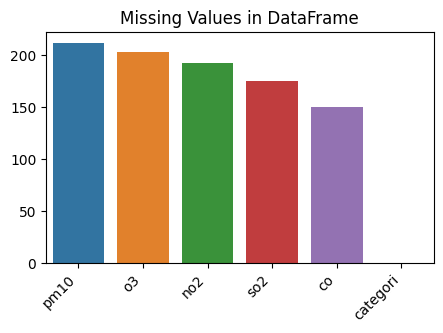

In [ ]:
null_df = null_df.sort_values(ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(x=null_df.index, y=null_df.values)
plt.title("Missing Values in DataFrame")
plt.xticks(rotation=45, ha="right")
plt.show()

Before proceeding with the imputation of null values, it is essential to conduct a thorough check for outliers within the observations containing null values.

In [ ]:
df_box = df[['pm10', 'so2', 'co', 'o3', 'no2']]

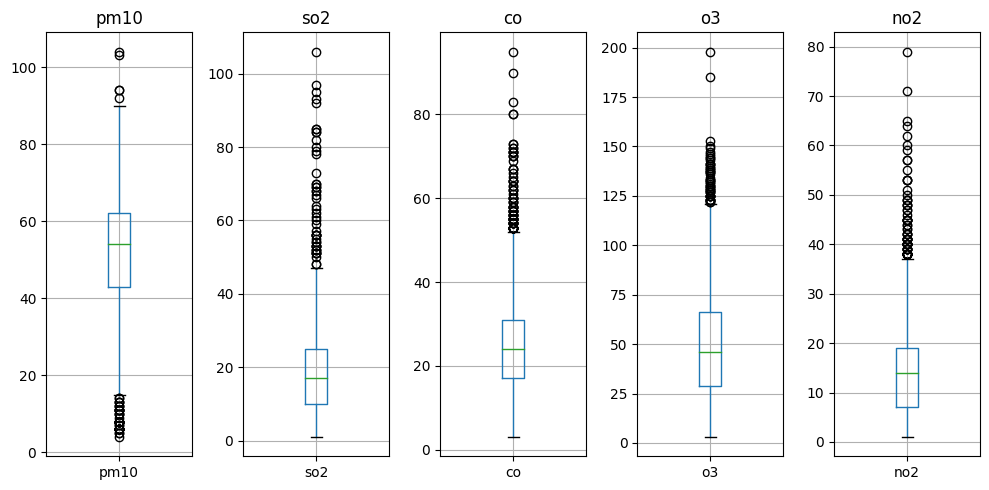

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_box.columns), figsize=(10, 5))

for i, column in enumerate(df_box.columns):
    df_box.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Based on the output, it can be said that all variables that have null values, also have outliers. Therefore, we impute the null values with the median value. This is because the **median value is less sensitive to outliers than the mean value**, so imputation using the median is often chosen when we have outliers in the dataset because the **median represents the middle value of the sorted data**, so it is **not affected by extreme values**. In addition, the **median maintains a more consistent distribution of the data**, especially if there is skewness or asymmetry in the distribution of the variables.

In [ ]:
df['pm10'].fillna(df.pm10.median(), inplace=True)
df['so2'].fillna(df.so2.median(), inplace=True)
df['co'].fillna(df.co.median(), inplace=True)
df['o3'].fillna(df.o3.median(), inplace=True)
df['no2'].fillna(df.no2.median(), inplace=True)

In [ ]:
print("Null value in dataframe:")
null_df = df.isnull().sum()
print(null_df)

Null value in dataframe:
pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


Now, with all null values successfully addressed in the dataframe, our data is considered clean. Each of the parameters, including pm10, so2, co, o3, no2, and categori, no longer contains any missing values.

### **2.3) Handle Outliers**

As indicated by our boxplot visualization, it is evident that our dataset exhibits outliers. To systematically address this issue, we leverage the Interquartile Range (IQR) technique, which involves establishing a threshold to identify and label data points as outliers. The IQR is computed by determining the difference between the third quartile (Q3) and the first quartile (Q1). Subsequently, upper and lower limits are established as part of this threshold, where any data point beyond these limits is considered an outlier.<br><br>
Following the determination of these limits, we proceed to eliminate the identified outliers from the dataset. This meticulous process is crucial for enhancing the overall reliability and accuracy of our data, resulting in a refined dataset that is free from extreme values. This, in turn, sets the stage for more robust analyses and modeling endeavors.

The reason why we remove outliers from the air quality data:
* Outliers can be caused by errors in the data collection process. These errors can be due to faulty sensors, data entry mistakes, or other problems. If these errors are not corrected, they can lead to misleading predictions.

* Outliers can represent extreme events that are not representative of the typical air quality in the city. These events can be caused by things like wildfires, industrial accidents, or power outages. If these outliers are not removed, they can make it difficult for the model to predict the air quality under normal conditions.

In [ ]:
def filter_outliers(dataframe, non_numeric_cols):
    df_copy = dataframe.copy()
    numeric_cols = df_copy.columns.difference(non_numeric_cols)

    for col in numeric_cols:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        upper_limit = Q3 + (1.5 * IQR)
        lower_limit = Q1 - (1.5 * IQR)

        df_copy = df_copy[df_copy[col] <= upper_limit]
        df_copy = df_copy[df_copy[col] >= lower_limit]

    df_copy = df_copy.reset_index(drop=True)
    return df_copy

In [ ]:
non_numeric_cols = ['categori']

In [ ]:
df_filtered = filter_outliers(df, non_numeric_cols)

After removing the outliers, we retain 92% of our original data. This percentage signifies that we have retained the majority of our initial dataset, and the removal of outliers hasn't resulted in a significant loss of information. This is a favorable outcome, indicating that our data cleaning process was effective in preserving the integrity of the dataset while addressing extreme values. Having a substantial portion of the original data remaining at 92% ensures that we maintain a representative and sufficiently large sample size for subsequent analyses.

In [ ]:
print("Percentage remaining: ", (len(df_filtered)/len(df))*100, "%")

Percentage remaining:  92.06023271731691 %


After removing the outliers, the improvement in our data is evident when visualized in a line chart. The revised chart now displays a more balanced representation without extreme values that were present initially.

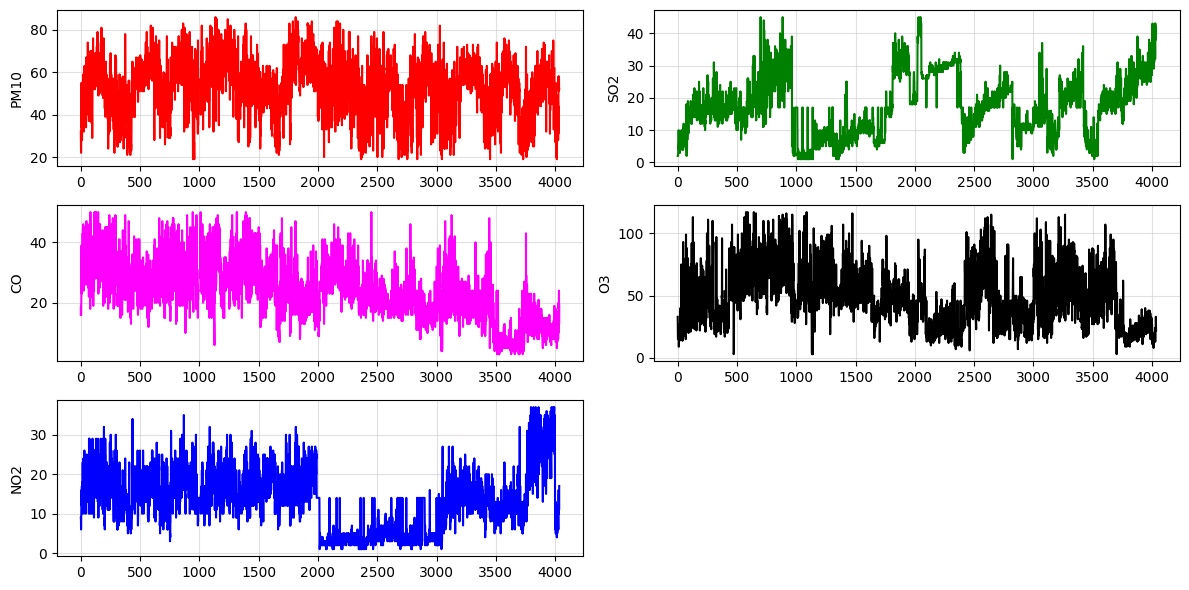

In [ ]:
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']
colors = ['red', 'green', 'magenta', 'black', 'blue']

fig, axs = plt.subplots(3, len(pollutants) // 2, figsize=(12, 6))

for i, pollutant in enumerate(pollutants):
    if i < len(pollutants):
        row = i // (len(pollutants) // 2)
        col = i % (len(pollutants) // 2)
        df_filtered.plot(y=pollutant, kind='line', color=colors[i], ax=axs[row, col], legend=False)
        axs[row, col].set_ylabel(pollutant.upper())
        axs[row, col].grid(True, linestyle='-', alpha=0.7, color='lightgrey')

if len(pollutants) < 6:
    for i in range(len(pollutants), 3 * (len(pollutants) // 2)):
        axs.flat[i].axis('off')

plt.tight_layout()
plt.show()

### **2.4) Oversampling**

After we remove the outliers, now we will try to check how much data is left for each category.

In [ ]:
df = df_filtered

As we can see, our data is very inbalanced where the 'Sedang' category data dominates our dataset. In addition, there is still data with the category 'Tidak Ada' which will not help the classification process and we will drop it.

In [ ]:
df['categori'].value_counts()

SEDANG            2845
BAIK              1008
TIDAK ADA DATA     110
TIDAK SEHAT         72
Name: categori, dtype: int64

In [ ]:
print("Percentage of 'TIDAK ADA DATA': ", (df['categori'].value_counts()['TIDAK ADA DATA'] / len(df)) * 100, "%")

Percentage of 'TIDAK ADA DATA':  2.7261462205700124 %


In [ ]:
df = df[df['categori'] != 'TIDAK ADA DATA']

In [ ]:
df['categori'].value_counts()

SEDANG         2845
BAIK           1008
TIDAK SEHAT      72
Name: categori, dtype: int64

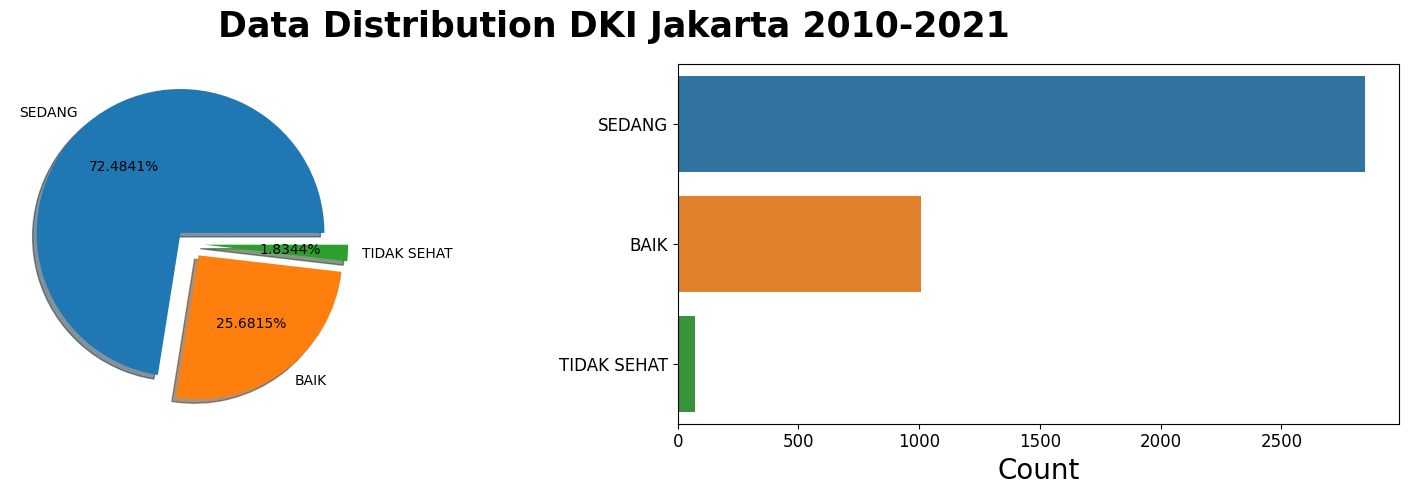

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

categori_counts = df['categori'].value_counts()
ax[0].pie(
    categori_counts,
    labels=categori_counts.index,
    shadow=True,
    explode=[0.1 for _ in range(categori_counts.nunique())],
    autopct='%.4f%%',
    textprops={'size': 10, 'color': 'black'}
)

sns.countplot(data=df, y='categori', ax=ax[1], order=categori_counts.index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize=12)
ax[1].set_xlabel('Count', fontsize=20)
ax[1].set_ylabel(None)
plt.xticks(fontsize=12)

fig.suptitle('Data Distribution DKI Jakarta 2010-2021', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

Given the considerable imbalance in our dataset, we are implementing oversampling to address this issue. Oversampling involves generating additional instances of the minority class to balance the distribution and ensure that each category has an equal representation in the dataset. Now, why is it important to have the same amount of data for each category?

Maintaining an equal distribution across categories is crucial for creating a robust and unbiased predictive model. When the data is imbalanced, the model may exhibit a bias towards the majority class, leading to suboptimal performance, particularly in predicting the minority class. By oversampling and equalizing the data for each category, we provide the model with a more balanced training set. This enables the model to learn effectively from both the majority and minority classes, enhancing its ability to generalize and make accurate predictions across all categories.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
y = df['categori']
x = df.drop('categori', axis=1)

oversampler = RandomOverSampler(sampling_strategy='not majority')
xOver, yOver = oversampler.fit_resample(x, y)

df = pd.concat([xOver, yOver], axis=1)
print(df['categori'].value_counts())

BAIK           2845
SEDANG         2845
TIDAK SEHAT    2845
Name: categori, dtype: int64


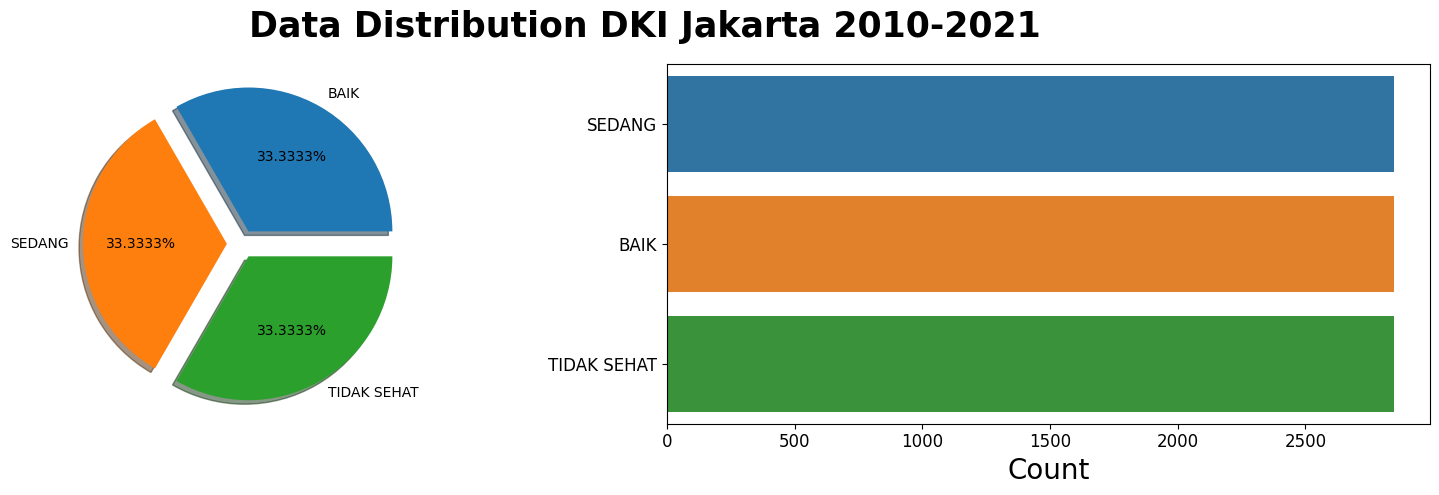

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

ax[0].pie(
    df.categori.value_counts(),
    labels=df.categori.value_counts().index,
    shadow=True,
    explode=[0.1 for _ in range(categori_counts.nunique())],
    autopct='%.4f%%',
    textprops={'size': 10, 'color': 'black'}
)

sns.countplot(data=df, y='categori', ax=ax[1], order=categori_counts.index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize=12)
ax[1].set_xlabel('Count', fontsize=20)
ax[1].set_ylabel(None)
plt.xticks(fontsize=12)

fig.suptitle('Data Distribution DKI Jakarta 2010-2021', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

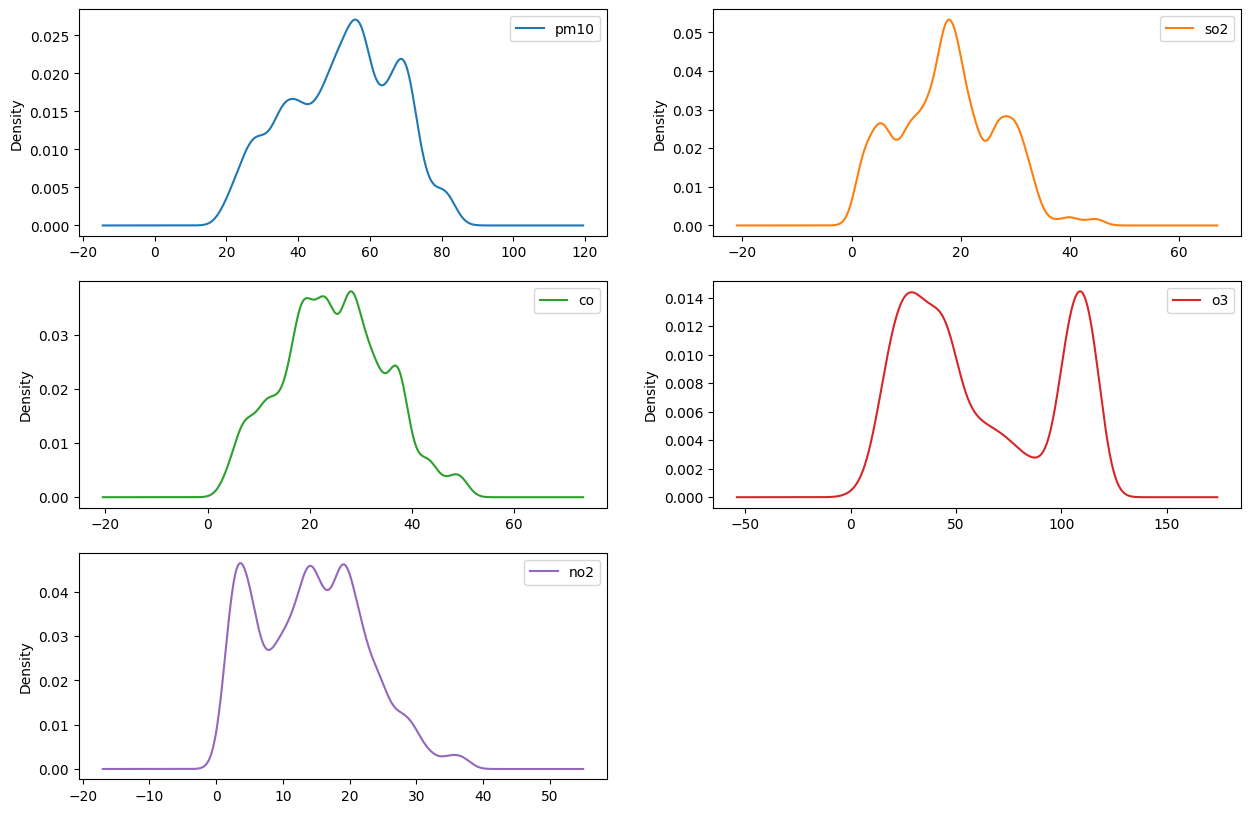

In [ ]:
numeric = df[['pm10', 'so2', 'co', 'o3', 'no2']]

numeric.plot(kind='density', subplots=True, layout=(3,2), figsize=(15, 10), sharex=False)
plt.show()

Even though outliers have been removed and oversampling done, the data distribution shows that the data is not normally distributed or even close to normal distribution at all.

### **2.5) Encode**

Now, we're transitioning to encoding the target variable in our dataset. This step is essential because machine learning models typically operate more effectively with numerical data rather than categorical data. By encoding the categorical target variable into numerical values, we enable the machine learning model to process and analyze the data more seamlessly.

In [ ]:
mapping = {'BAIK': 0,'SEDANG': 1, 'TIDAK SEHAT': 2}
df['categori'] = df['categori'].map(mapping)

In [ ]:
df['categori'].value_counts()

0    2845
1    2845
2    2845
Name: categori, dtype: int64

### **2.5) Correlation**

Moving forward, our next step involves exploring the correlation between each column in our dataset. Correlation analysis allows us to understand the relationships between different columns, particularly their connection to the target column. By assessing the correlation, we gain insights into which features exhibit significant relationships and influence the target variable

<Axes: >

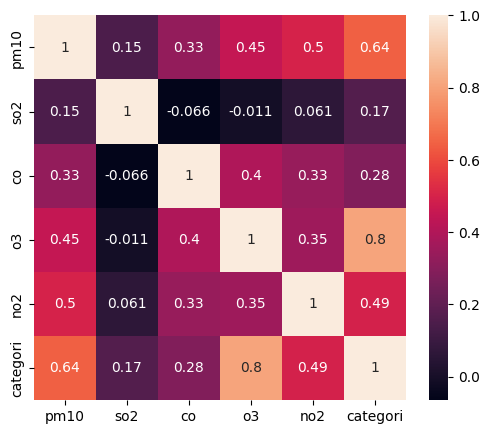

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True)

Based on the correlation heat map above, it's evident that each column in our dataset exhibits a positive correlation with the target column. This indicates a tendency for the values in these columns to move in the same direction as the target variable. Notably, the 'pm10' and 'so3' columns stand out with high correlations to the target, suggesting a strong relationship.

However, it's important to note that the other columns display correlations below 0.5. While still positive, these correlations are considered moderate. This signifies a less pronounced influence on the target variable compared to 'pm10' and 'so2.'

### **2.6) Feature Importance**

In the next step, we will try to find the feature importance for each column using a decision tree. This process serves a crucial role in unraveling the significance of each feature in contributing to our predictive model.  Ultimately, the information gained from this feature importance analysis guides us in making informed decisions about feature selection.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
numeric_cols = df.columns.difference(non_numeric_cols)
model.fit(df[numeric_cols], df['categori'])

DecisionTreeClassifier()

In [ ]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': numeric_cols, 'Importance': importances})

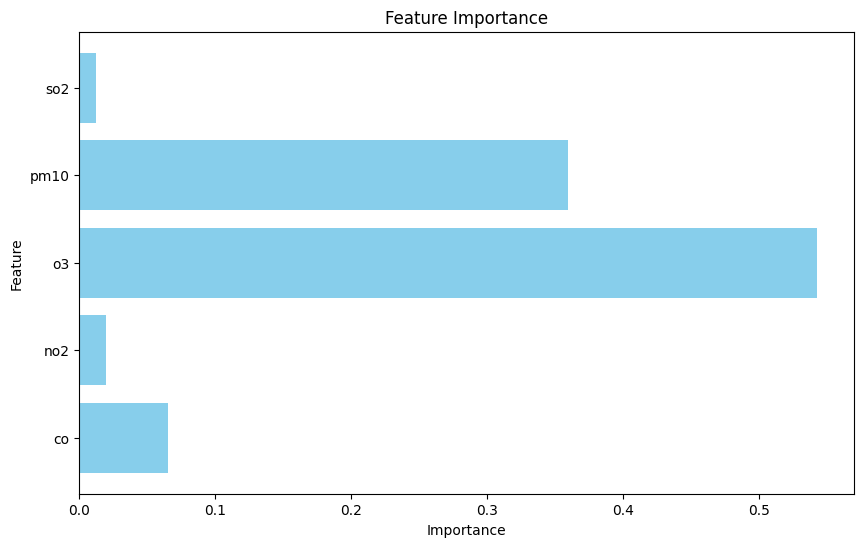

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

From the plot below, we can see that the only features with **high importance** values are **pm10 and so3** in line with their correlations. Therefore, **are all these features known to contribute to air quality?** If so, **even if their importance is lower**, they might **still provide meaningful information** when combined. For instance, pollutants like SO2, CO, and NO2 might have lower importance individually but **could interact with other pollutants to affect air quality.**

However, it is important to note that the importance of features does not **necessarily imply a cause-and-effect relationship**. In other words, although 'pm10' and 'o3' have the highest importance, it does not mean that other features ('so2', 'co', 'no2') **do not affect air quality**. They may **affect air quality in ways that are not captured by the model**.

Since all features do contain harmful particles and we believe that they all contribute to air quality, we may want to include all of them for several reasons:

* Each feature ('pm10', 'so2', 'co', 'o3', 'no2') represents a different type of air pollutant. While 'pm10' and 'o3' may have the highest feature importance in the current model, other pollutants can also have an impact on air quality. **By including all features, we want to ensure that our model takes into account a wide variety of pollutants**.

* If our model is trained with a specific data set or model, it may show that only 'pm10' and 'o3' are important. But if the data changes in the future **(which often happens in real-world scenarios)**, other features may become important. **By including all features, the model may be more stable to such changes.**

### **2.7) Feature Scaling**

Our next objective is to standardize our data using a MinMax scaler. We undertake this process with the aim of achieving a uniform scale for all the features.  It prevents certain features from dominating the model simply due to their larger magnitudes.

Min-Max Scaler is often used as the default scaler because it scales data to a fixed range (usually 0 to 1). The advantage of Min-Max scaling is that it preserves zero values on sparse data. This is a good choice when the distribution is not Gaussian or the standard deviation is very small. However, this scaling is sensitive to outliers.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df[['pm10', 'so2', 'co', 'o3', 'no2']] = scaler.fit_transform(df[['pm10', 'so2', 'co', 'o3', 'no2']])

In [ ]:
df= df[ ['pm10', 'so2', 'co', 'o3', 'no2', 'categori']]

In [ ]:
df.head()

,pm10,so2,co,o3,no2,categori
0,0.194030,0.022727,0.276596,0.263158,0.222222,0
1,0.119403,0.022727,0.340426,0.149123,0.222222,0
2,0.044776,0.022727,0.276596,0.105263,0.138889,0
3,0.089552,0.022727,0.297872,0.105263,0.194444,0
4,0.164179,0.045455,0.404255,0.140351,0.277778,0



Given that we have dealt with outliers in our air quality data and the distribution is not normal for some features, the Min-Max Scaler might be a better choice as it will be able to perform better on the non-normal distribution of the data than other scaler techniques.

# **3) Train Model**

## **Splitting Dataset**

In this data splitting process, we divided the dataset into 80% for training and 20% for testing. We also used a random state of 42 to ensure the consistency of the model performance.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['pm10', 'so2', 'co', 'o3', 'no2']]
y = df['categori']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6828, 5)
Shape of y_train: (6828,)
Shape of X_test: (1707, 5)
Shape of y_test: (1707,)


For the first experiment, we used the **default hyperparameters** in our model to **assess their performance**. If the **performance** of each model is good enough, then the need for **hyperparameter tuning is no longer necessary**.

## **Data Modelling**

In this case, we will use several classification models and fit the models to the training data:

1. Decision Tree
2. Logistic Regression
3. K-Nearest Neighbors (KNN)
4. Random Forest
5. Support Vector Machine (SVM)
6. XGBoost

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict=DT_Model.predict(X_test)

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_Model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR_Model.fit(X_train, y_train)
LR_Predict=LR_Model.predict(X_test)

### **K-nearest neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict=KNN_Model.predict(X_test)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier()
RF_Model.fit(X_train, y_train)
RF_Predict=RF_Model.predict(X_test)

### **Support Vector Machine**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

SVM_Model = SVC()
SVM_Model.fit(X_train, y_train)
SVM_Predict=SVM_Model.predict(X_test)

### **XGBoost**

In [ ]:
import xgboost as xgb

XGB_Model = xgb.XGBClassifier()
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_test)

# **4) Evaluate Model**

#### **We evaluated the performance of the six different classification models using four different metrics:**

* **Precision**: This metric indicates the proportion of positive predictions that are actually correct. A higher precision score indicates a model that is more precise in its positive predictions.

* **Recall**: This metric indicates the proportion of actual positives that are correctly predicted. A higher recall score indicates a model that is more effective in identifying all actual positives.

* **F1-Score**: This metric is the harmonic mean of precision and recall, providing a single measure that balances both metrics. A higher F1-score indicates a model that performs well in terms of both precision and recall.

* **Accuracy**: This metric simply indicates the overall proportion of correctly classified instances. A higher accuracy score indicates a model that is generally good at classifying both positive and negative instances.

The advantage of using these metrics together is that they provide a more comprehensive view of the model performance. While accuracy alone might seem sufficient, it can be misleading in certain situations. For example, a model that simply predicts the majority class all the time will have a high accuracy score, but it does not provide any useful information. Using metrics like precision, recall, and F1-score can help us identify models that are performing well even in cases where the majority class is dominant.

In [ ]:
from sklearn.metrics import classification_report

DT_Report = classification_report(y_test, DT_Predict)
LR_Report = classification_report(y_test, LR_Predict)
KNN_Report = classification_report(y_test, KNN_Predict)
RF_Report = classification_report(y_test, RF_Predict)
SVM_Report = classification_report(y_test, SVM_Predict)
XGB_Report = classification_report(y_test, XGB_Predict)

reports = {
    'Decision Tree': DT_Report,
    'Logistic Regression': LR_Report,
    'K-Nearest Neighbors': KNN_Report,
    'Random Forest': RF_Report,
    'Support Vector Machine': SVM_Report,
    'XGBoost': XGB_Report,
}

for model, report in reports.items():
    print(f"Report for {model}:\n\n{report}\n{'='*50}\n")

Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       579
           1       1.00      0.98      0.99       546
           2       1.00      1.00      1.00       582

    accuracy                           0.99      1707
   macro avg       0.99      0.99      0.99      1707
weighted avg       0.99      0.99      0.99      1707


Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       579
           1       0.79      0.79      0.79       546
           2       0.89      0.90      0.89       582

    accuracy                           0.87      1707
   macro avg       0.86      0.86      0.86      1707
weighted avg       0.87      0.87      0.87      1707


Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       579
           1       0.97      0.92 

#### **Evaluation**:

Based on the classification report above, XGBoost is the best model with an accuracy of 1.00. It also has perfect precision, recall, and F1-score. Random Forest and Decision Tree are also very good models with an accuracy of 0.99. K-Nearest Neighbors and Support Vector Machine have an accuracy of 0.96 and 0.95, respectively. Logistic Regression is the worst model with an accuracy of 0.87.

* XGBoost and Random Forest also achieved perfect recall for all classes.
* Logistic Regression had the lowest recall for all classes.
* All models except Logistic Regression achieved F1-score above 0.95.

Overall, XGBoost demonstrates the best performance, achieving perfect accuracy and high scores across all evaluation metrics. Decision Tree and Random Forest also perform excellently, followed by KNN and SVM. Logistic Regression performs comparatively lower in terms of accuracy and balanced precision-recall scores.

# **Summary & Conclusion**

This project **examines the urgent issue of air pollution in Jakarta**, a city that faces significant challenges due to multiple sources of pollution. The problem derives from motor vehicle activities, industrial operations, waste accumulation, and external pollution inputs, leading to an Air Pollution Standard Index (ISPU) that indicates unhealthy-moderate air quality. Recognizing the severe health implications, including respiratory problems, heart disease, and cancer, the aim of this project is to **develop an accurate and efficient predictive model to classify the air pollution index**.

The project itself involved detailed data analysis, feature engineering, and training models with various algorithms, including Decision Tree, Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, Support Vector Machine (SVM), and XGBoost. The evaluation revealed **XGBoost as the most outstanding model**, achieving a perfect accuracy of 1.00 and high precision, recall, and F1-score in all classes. Random Forest and Decision Tree also showed excellent performance, with an accuracy of 0.99. KNN and SVM followed with 0.96 and 0.95 accuracy, respectively, while Logistic Regression lagged behind with 0.87 accuracy.

By providing an accurate predictive model to classify air quality, the project paves the way for a healthier and more sustainable future for Jakarta and beyond.